In [310]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np
from statsmodels.tsa.stattools import adfuller
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',178)

In [311]:
sns.set_theme(style='white')

In [312]:
df = pd.read_csv('../output/df_2020_2024.csv', index_col='Date')
df.index = pd.to_datetime(df.index)

In [313]:
# Functions 
def boxplot_(df, x, y, title, x_label, y_label, color='blue', bitcoin=False, hue=None, ticks=None, show_leg = False):
    if bitcoin == True:
        color = 'orange'
    plt.subplots(figsize=(10,5))
    sns.boxplot(data=df, x=x, y=y, hue=hue, color=color)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(list(range(len(ticks))),ticks)
    plt.title(title)
    plt.legend().remove()
    plt.show()
    if show_leg == True:
        plt.legend(loc='best')

def scatter_(df, x, y, title, x_label, y_label, color='blue', bitcoin=False, hue=None, show_leg = False):
    if bitcoin == True:
        color = 'orange'
    plt.show()
    plt.subplots(figsize=(10,5))
    sns.scatterplot(data=df, x=x, y=y, hue=hue)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend().remove()
    if show_leg == True:
        plt.legend(loc='best')

def timeseries_plot(df, y, ylabel, color='blue', bitcoin=False, existing_ax=None):
    if bitcoin == True:
        color = 'orange'
    if existing_ax == None:
        fig, ax = plt.subplots(figsize=(10,5))
    else:
        ax = existing_ax
    sns.lineplot(df, x=df.index, y=y, color=color, label=y)
    ax.set(title=f"{ylabel} over time", ylabel=ylabel, label=y.replace("_"," "), xlabel="Date")
    plt.legend(loc='best')

def dickeyFullerTest(df):
    for column in df.columns: 
        result = adfuller(df[column])
        # print(f"Column: {column}, ADF statistic: {result[0]}, p-value: {result[1]}")
        # for key, value in result[4].items():
        #     print(f"Critical value ({key}): {value}")
        if (result[1] < 0.05) &  (result[4]['1%'] > result[0]):
            print(f'{column} is stationary')
        else: 
            print(f'{column} is not stationary')

from mpl_toolkits.axes_grid1 import host_subplot

def plot_dual_axis_timeseries(df, y1, y2, ylabel1, ylabel2, color1="blue", color2="orange"):
    fig, axi = plt.subplots(figsize=(10,5))
    ax = host_subplot(111) # subplot(nrows, ncols, plot_number)
    ax0 = ax.twinx()
    ax1 = sns.lineplot(data=df, x=df.index, y=y1, ax=ax, color=color1, label=ylabel1, legend=False)
    ax2 = sns.lineplot(data=df, x=df.index, y=y2, ax=ax0, color=color2, label=ylabel2, legend=False)
    axi.set(xticks=[], yticks=[])
    ax1.set(ylabel=ylabel1, title=f"{ylabel1} and {ylabel2} over time")
    ax0.set(ylabel=ylabel2)
    ax.legend()
    ax.yaxis.get_label()
    ax.yaxis.get_label()

# annotate and vertical line
def annotate_and_line(x=None, y=None, color="red", linestyle="--", annotation=None, vertical_line=False, time_series=False, annot_x=None):    
    if time_series:
        x=pd.to_datetime(x)
        annot_x = pd.to_datetime(annot_x)
    if vertical_line:    
        plt.axvline(x, color=color, linestyle=linestyle)
    if annot_x:
        x = annot_x
    if annotation:
        plt.annotate(annotation, xy=(x, y), color=color)

# Corr bar plot
def corr_bar(df, title, y_label, group, var_comp):
    data = df.corr()[var_comp]
    plt.figure(figsize=(10,5))
    data[group].sort_values().plot(kind='bar', color='blue')
    plt.title(title)
    plt.ylabel(y_label)
    plt.show()

# Histogram and boxplot (and skew output) CLO

def den_hist_boxplot(features, bins):
    for col in features:
        print(f'{col} skew: {round(df[col].skew(), 2)}')
        plt.figure(figsize = (15,5))
        plt.subplot(1, 2, 1)
        sns.histplot(df[col], bins=bins, stat='density', kde=True)
        plt.xticks(rotation=90)
        plt.ticklabel_format(style='plain')
        plt.title(f'Density Histogram of {col}')
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        plt.xticks(rotation=90)

# Histogram JM
def histogram_plot(df, x, xlabel, bin_edges, stat='density', kde=True, color='blue', bitcoin=False, xrange=None, yrange=None):
    if bitcoin == True: 
        color = 'orange'
    fig, ax = plt.subplots(figsize = (10, 5))
    sns.histplot(data=df, x=x, stat=stat, kde=kde, bins=bin_edges, color=color)
    ax.set(title=f'{xlabel} Overall Distribution', xlabel=xlabel, xlim=xrange, ylim=yrange);


BTC_Open skew: 0.35
BTC_High skew: 0.35
BTC_Low skew: 0.35
BTC_Close_Price skew: 0.35


BTC_Vol. skew: 4.37
Tot_Num_Unique_Address_BTC_Per_Day skew: 0.12
Total_Num_Transactions_Per_Day skew: 1.74


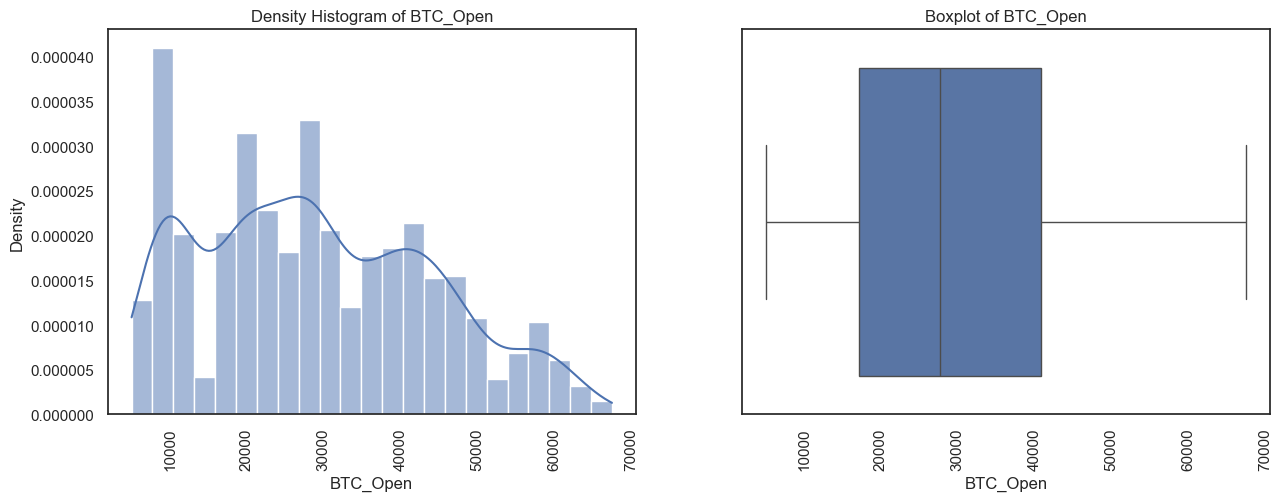

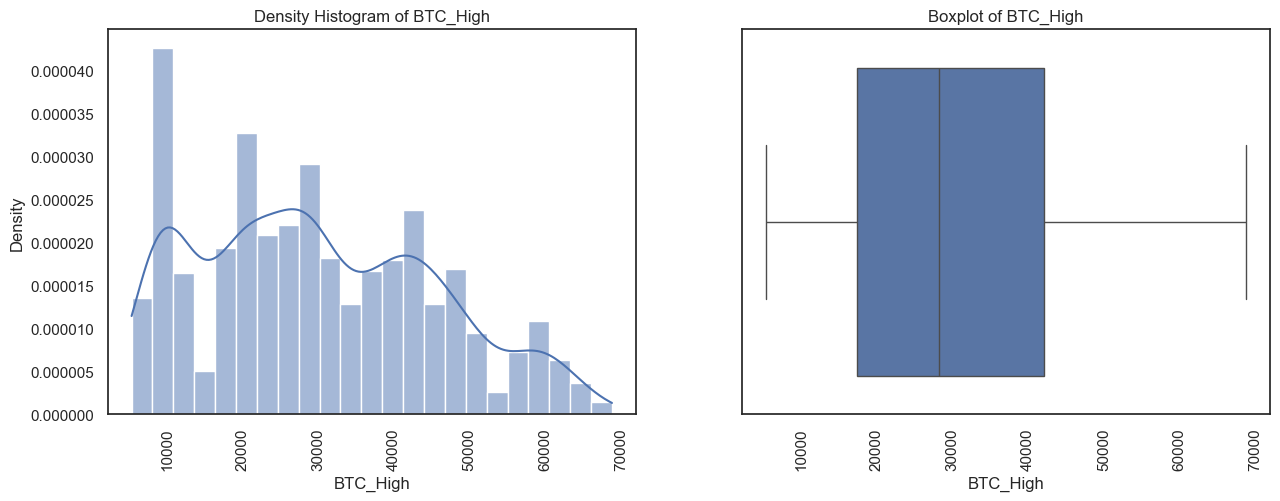

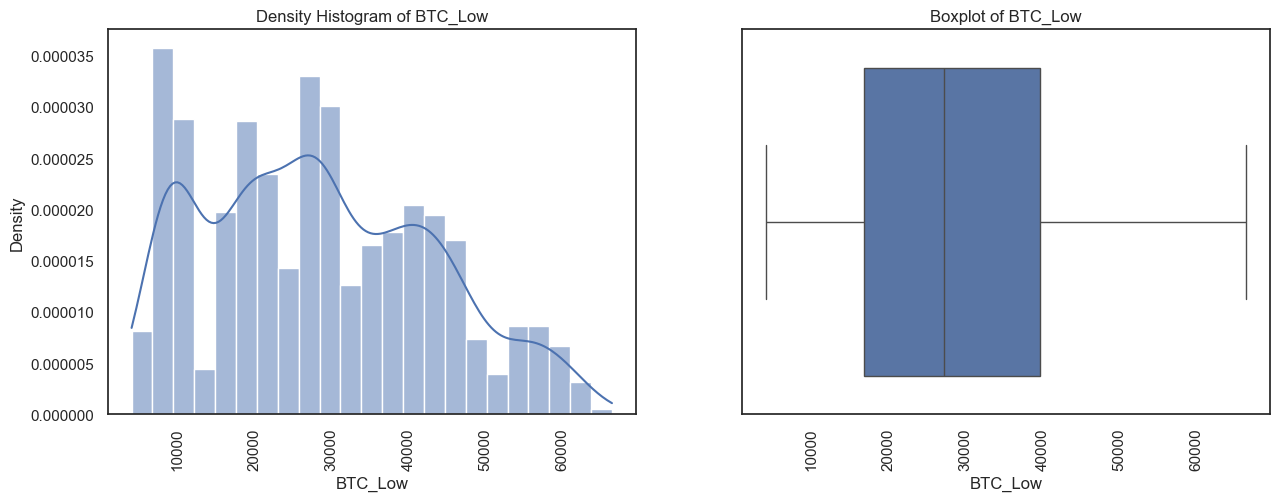

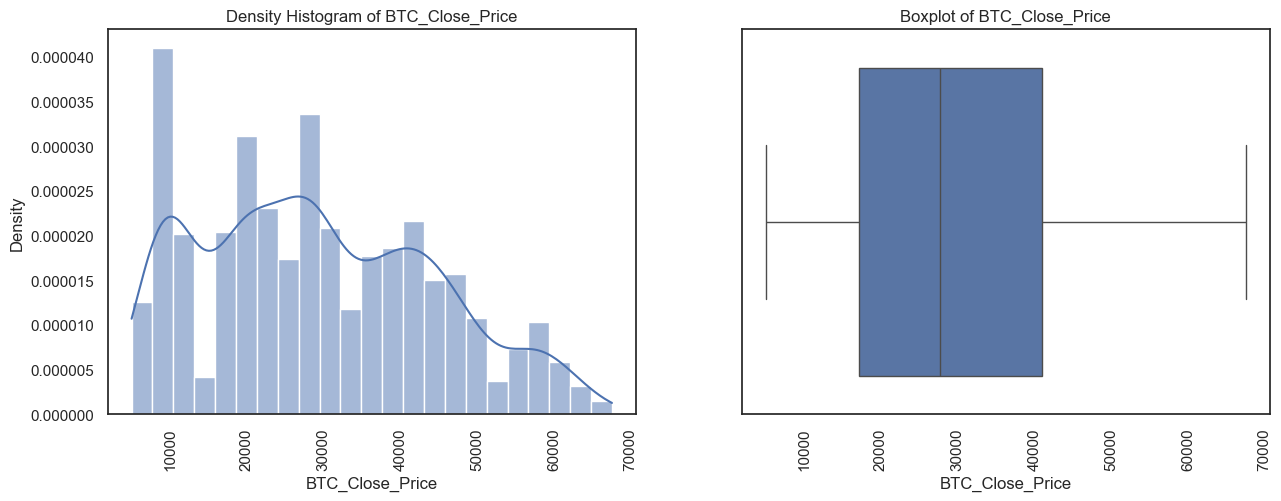

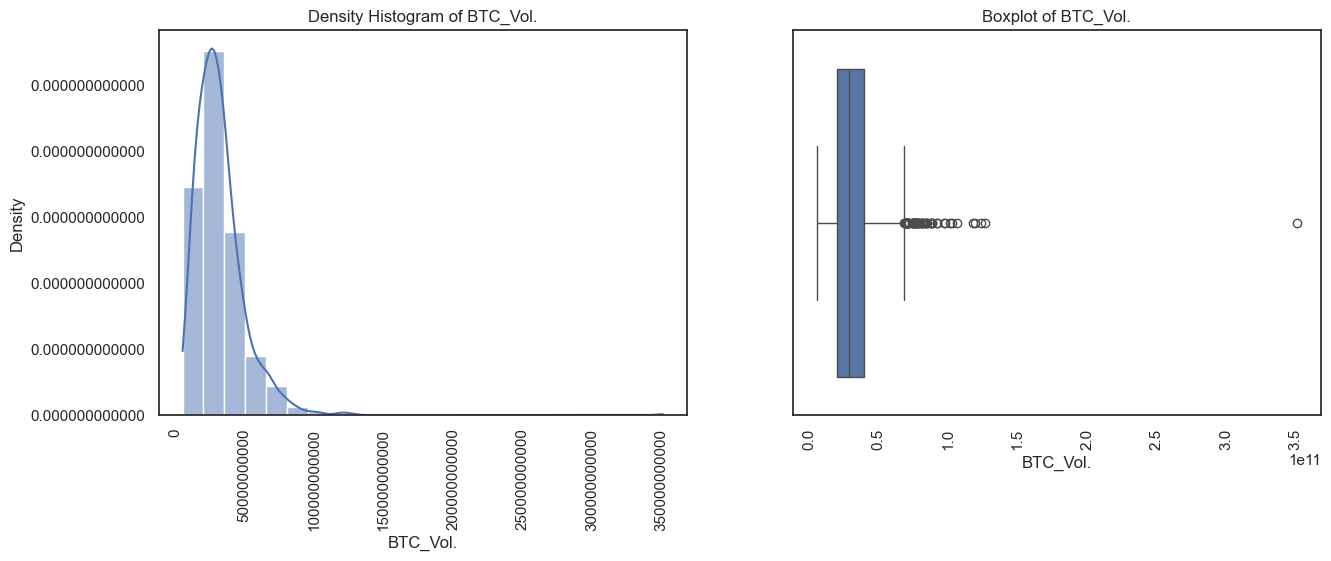

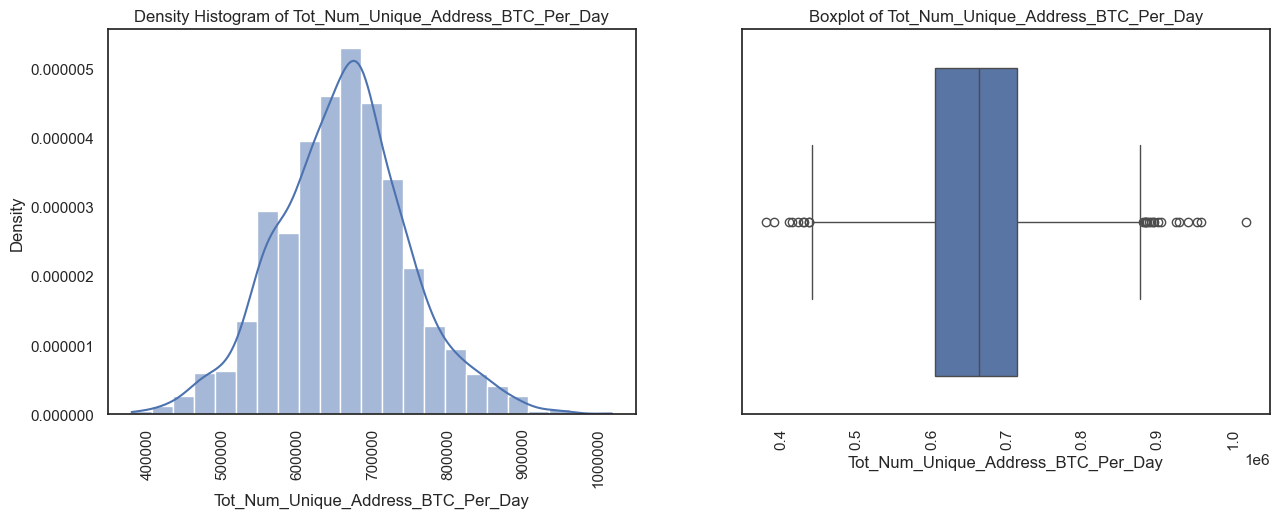

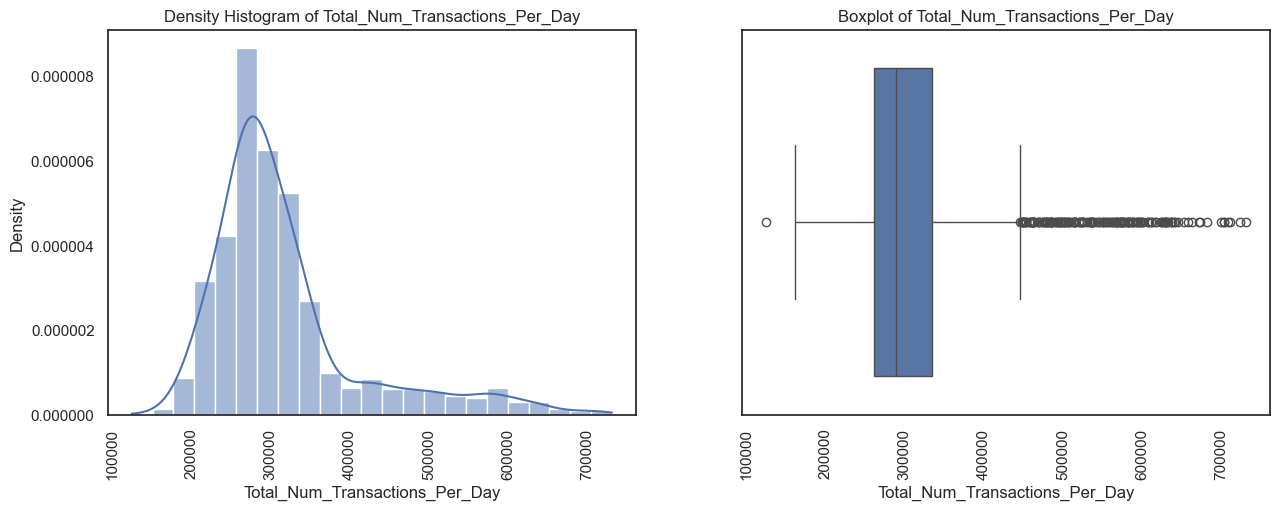

In [314]:
bitcoin_features = [
    'BTC_Open', 'BTC_High', 'BTC_Low', 'BTC_Close_Price', 'BTC_Vol.',
    'Tot_Num_Unique_Address_BTC_Per_Day', 'Total_Num_Transactions_Per_Day'
    ]

den_hist_boxplot(bitcoin_features, 23)

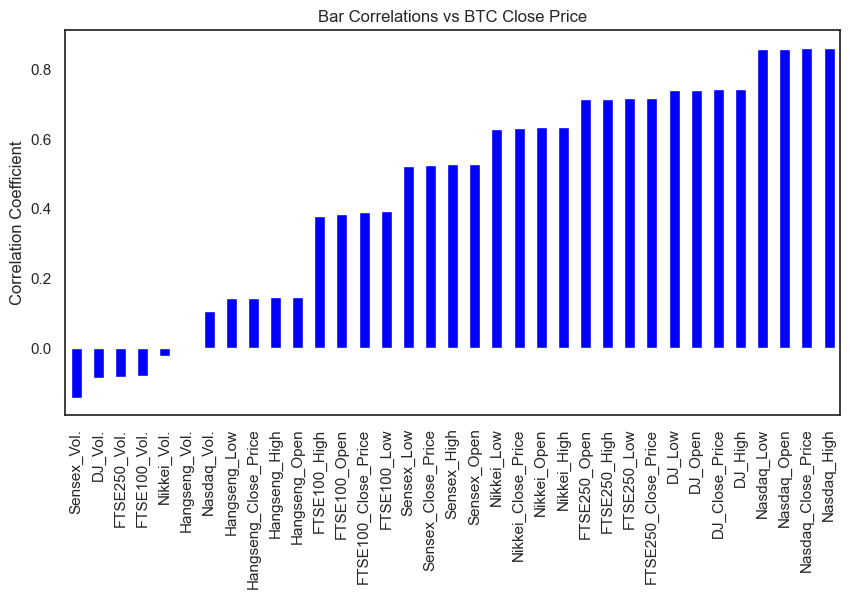

In [315]:
markets_features = [
    'FTSE100_Open', 'FTSE100_High', 'FTSE100_Low', 'FTSE100_Close_Price', 'FTSE100_Vol.',
    'DJ_Open', 'DJ_High', 'DJ_Low', 'DJ_Close_Price', 'DJ_Vol.',
    'Nasdaq_Open', 'Nasdaq_High', 'Nasdaq_Low', 'Nasdaq_Close_Price', 'Nasdaq_Vol.',
    'Sensex_Open', 'Sensex_High', 'Sensex_Low', 'Sensex_Close_Price', 'Sensex_Vol.',
    'Hangseng_Open', 'Hangseng_High', 'Hangseng_Low', 'Hangseng_Close_Price', 'Hangseng_Vol.',
    'Nikkei_Open', 'Nikkei_High', 'Nikkei_Low', 'Nikkei_Close_Price', 'Nikkei_Vol.',
    'FTSE250_Open', 'FTSE250_High', 'FTSE250_Low', 'FTSE250_Close_Price', 'FTSE250_Vol.']

corr_bar(df, title='Bar Correlations vs BTC Close Price', y_label='Correlation Coefficient', group=markets_features, var_comp='BTC_Close_Price')

In [316]:
ticks=['M','T','W','T','F','S','S']
list(range(len(ticks)))

[0, 1, 2, 3, 4, 5, 6]

In [317]:
# Additional features 

df['day_of_week']  = df.index.day_of_week
df['is_weekend'] = df['day_of_week'] > 4
df['month'] = df.index.month
df['year'] = df.index.year

C:\Users\olive\AppData\Local\Temp\ipykernel_26664\3865746850.py:6: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:orange'` for the same effect.

  sns.boxplot(data=df, x=x, y=y, hue=hue, color=color)


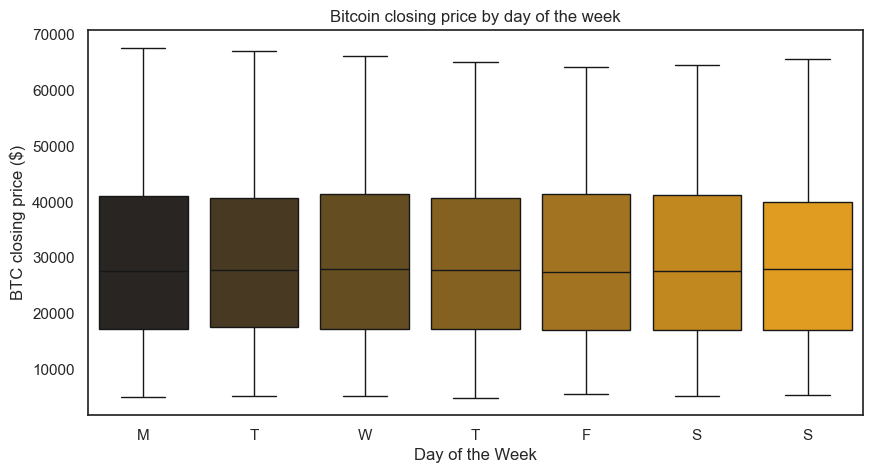

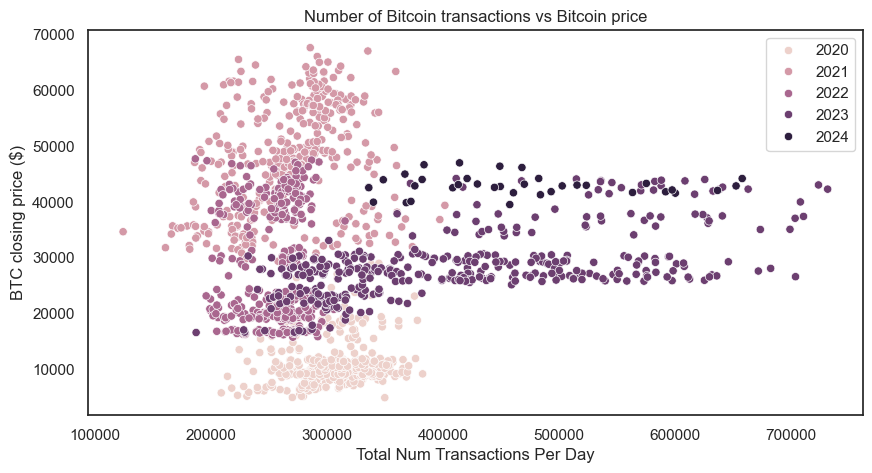

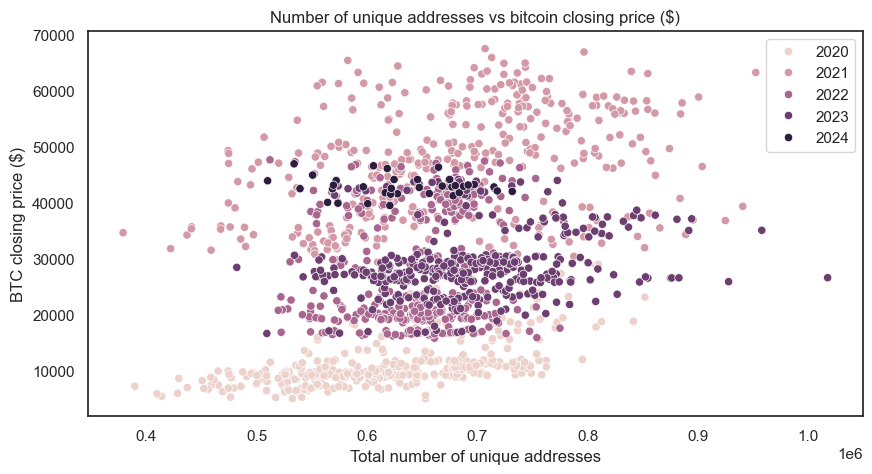

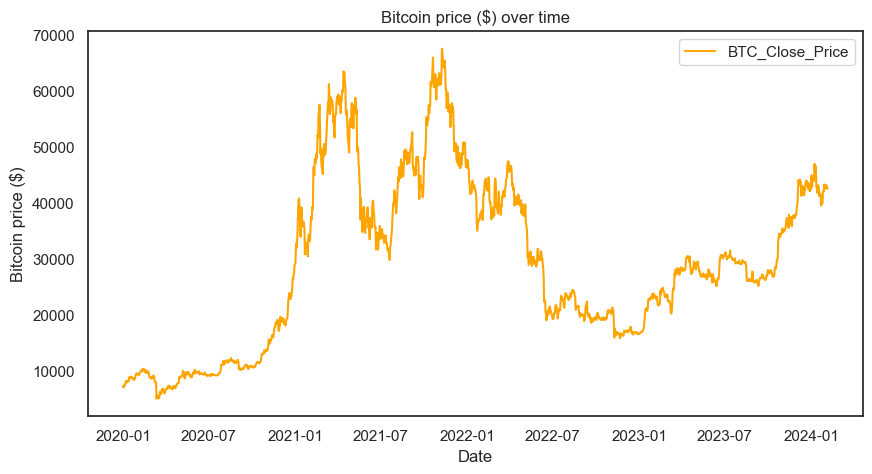

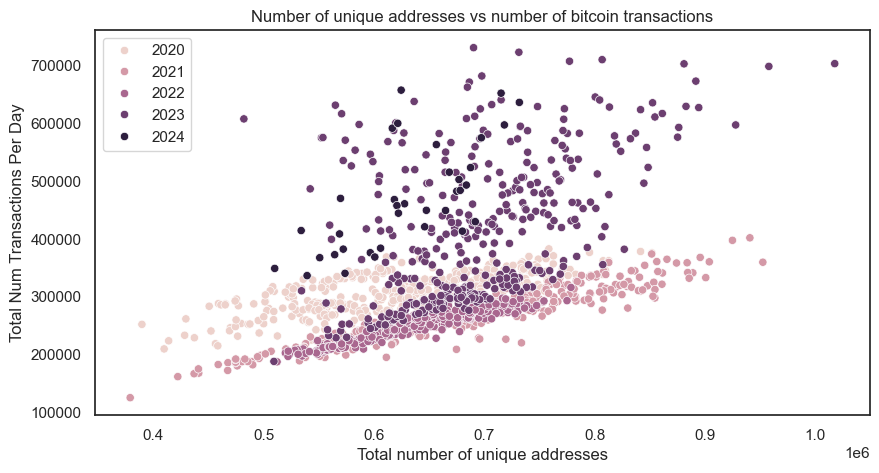

In [318]:
# bitcoin features 

## Does the day of the week impact bitcoin price?

boxplot_(df, y='BTC_Close_Price', x='day_of_week', bitcoin=True, x_label='Day of the Week', hue='day_of_week', y_label='BTC closing price ($)', title = 'Bitcoin closing price by day of the week', ticks=['M','T','W','T','F','S','S'])

## Does the price of bitcoin impacted by the total number of daily transactions


scatter_(df, y='BTC_Close_Price', x='Total_Num_Transactions_Per_Day', bitcoin=True, x_label='Total Num Transactions Per Day', hue='year', y_label='BTC closing price ($)', title = 'Number of Bitcoin transactions vs Bitcoin price', show_leg=True)

## The price of bitcoin is not impacted by the total number of unique transactions

scatter_(df, x='Tot_Num_Unique_Address_BTC_Per_Day', y='BTC_Close_Price', x_label='Total number of unique addresses', y_label= 'BTC closing price ($)', bitcoin=True, hue='year', show_leg=True, title='Number of unique addresses vs bitcoin closing price ($)')

## The price of bitcoin is not impacted by the halving of bitcoin mining rewards (different time frames) (O,J,L)

timeseries_plot(df,y='BTC_Close_Price', ylabel='Bitcoin price ($)', bitcoin=True)

## The number of transactions and the number of unique addresses is correlated?

scatter_(df, x='Tot_Num_Unique_Address_BTC_Per_Day', y='Total_Num_Transactions_Per_Day',x_label='Total number of unique addresses', y_label='Total Num Transactions Per Day', hue='year', title='Number of unique addresses vs number of bitcoin transactions', show_leg=True)

In [319]:
bitcoin_features = [
    'BTC_Open', 'BTC_High', 'BTC_Low', 'BTC_Close_Price', 'BTC_Vol.',
    'Tot_Num_Unique_Address_BTC_Per_Day', 'Total_Num_Transactions_Per_Day'
    ]
markets_features = [
    'FTSE100_Open', 'FTSE100_High', 'FTSE100_Low', 'FTSE100_Close_Price', 'FTSE100_Vol.',
    'DJ_Open', 'DJ_High', 'DJ_Low', 'DJ_Close_Price', 'DJ_Vol.',
    'Nasdaq_Open', 'Nasdaq_High', 'Nasdaq_Low', 'Nasdaq_Close_Price', 'Nasdaq_Vol.',
    'Sensex_Open', 'Sensex_High', 'Sensex_Low', 'Sensex_Close_Price', 'Sensex_Vol.',
    'Hangseng_Open', 'Hangseng_High', 'Hangseng_Low', 'Hangseng_Close_Price', 'Hangseng_Vol.',
    'Nikkei_Open', 'Nikkei_High', 'Nikkei_Low', 'Nikkei_Close_Price', 'Nikkei_Vol.',
    'FTSE250_Open', 'FTSE250_High', 'FTSE250_Low', 'FTSE250_Close_Price', 'FTSE250_Vol.'
]
currency_features = [
    'USD_CNY_Open', 'USD_CNY_High', 'USD_CNY_Low', 'USD_CNY_Close_Price', 'USD_CNY_Vol.',
    'USD_JPY_Open', 'USD_JPY_High', 'USD_JPY_Low', 'USD_JPY_Close_Price', 'USD_JPY_Vol.',
    'GBP_USD_Open', 'GBP_USD_High', 'GBP_USD_Low', 'GBP_USD_Close_Price', 'GBP_USD_Vol.'
]
commodities_features = [
    'Gold_Open', 'Gold_High', 'Gold_Low', 'Gold_Close_Price', 'Gold_Vol.',
    'Crude_Oil_Brent_Open', 'Crude_Oil_Brent_High', 'Crude_Oil_Brent_Low', 'Crude_Oil_Brent_Close_Price', 'Crude_Oil_Brent_Vol.',
    'Crude_Oil_Wti_Open', 'Crude_Oil_Wti_High', 'Crude_Oil_Wti_Low', 'Crude_Oil_Wti_Close_Price', 'Crude_Oil_Wti_Vol.',
    'Natural_Gas_Open','Natural_Gas_High', 'Natural_Gas_Low', 'Natural_Gas_Close_Price', 'Natural_Gas_Vol.'
]
inflation_features = ['Inflation']
intrest_rate_features = [
    'US_Treasury_Interest_Rate_%_Open', 'US_Treasury_Interest_Rate_%_High',
    'US_Treasury_Interest_Rate_%_Low', 'US_Treasury_Interest_Rate_%_Close_Price',
    'US_Treasury_Interest_Rate_%_Vol.'
]
cryptocurrency_features = [
    'ETH_Open', 'ETH_High', 'ETH_Low', 'ETH_Close_Price', 'ETH_Vol.',
    'BNB_Open', 'BNB_High', 'BNB_Low', 'BNB_Close_Price', 'BNB_Vol.',
    'ADA_Open', 'ADA_High','ADA_Low', 'ADA_Close_Price', 'ADA_Vol.',
    'POL_Open', 'POL_High', 'POL_Low', 'POL_Close_Price', 'POL_Vol.',
    'USDT_Open', 'USDT_High', 'USDT_Low', 'USDT_Close_Price', 'USDT_Vol.',
    'XRP_Open', 'XRP_High', 'XRP_Low', 'XRP_Close_Price', 'XRP_Vol.',
    'USDC_Open', 'USDC_High', 'USDC_Low', 'USDC_Close_Price', 'USDC_Vol.',
    'DGC_Open', 'DGC_High', 'DGC_Low', 'DGC_Close_Price', 'DGC_Vol.',
    'SOL_Open', 'SOL_High', 'SOL_Low', 'SOL_Close_Price', 'SOL_Vol.'
    ]
companies_features = [
    'MSTR_Open', 'MSTR_High', 'MSTR_Low', 'MSTR_Close_Price', 'MSTR_Vol.',
    'GLXY_Open', 'GLXY_High', 'GLXY_Low', 'GLXY_Close_Price', 'GLXY_Vol.',
    'TSLA_Open', 'TSLA_High', 'TSLA_Low', 'TSLA_Close_Price', 'TSLA_Vol.',
    'MARA_Open', 'MARA_High', 'MARA_Low', 'MARA_Close_Price', 'MARA_Vol.',
    'SQ_Open', 'SQ_High',  'SQ_Low', 'SQ_Close_Price', 'SQ_Vol.',
    'VYGVQ_Open', 'VYGVQ_High', 'VYGVQ_Low', 'VYGVQ_Close_Price', 'VYGVQ_Vol.'
]
confidence_features = ['Business_Confidence', 'Consumer_Confidence']
news_features = [
    'Senticrypt_Volume', 'Senticrypt_Score_1', 'Senticrypt_Score_2', 'Senticrypt_Score_3',
    'Senticrypt_Count', 'Senticrypt_Mean', 'Senticrypt_Sum'
]

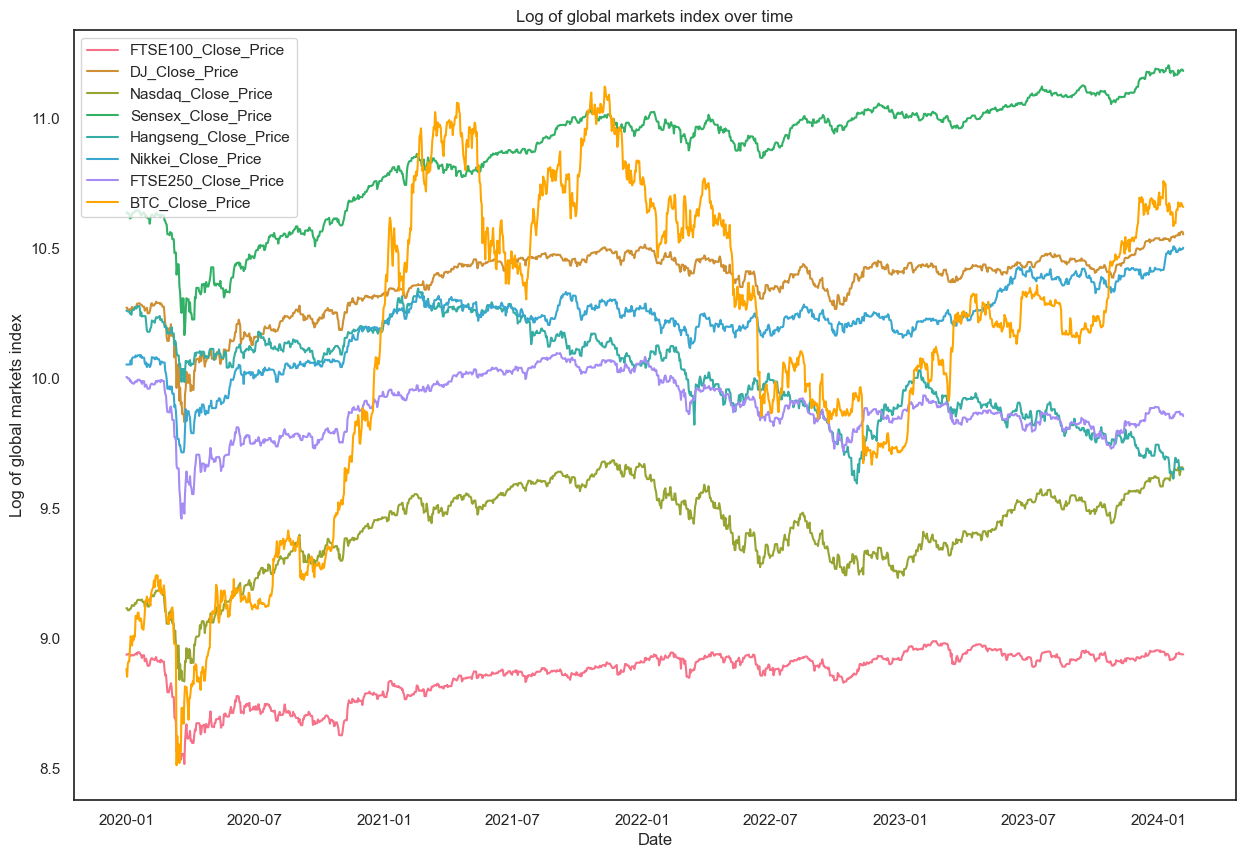

In [320]:
# global markets 

# For each of the global markets the price of bitcoin does not follow the index 

global_markets_column_names = [i for i in markets_features if 'Close' in i]
global_markets_column_names.append('BTC_Close_Price')

df_global_markets = df[global_markets_column_names].copy()

for col in global_markets_column_names:
    df_global_markets[col] = np.log(df[col])

fig, ax = plt.subplots(figsize=(15,10))

for i,j in enumerate(global_markets_column_names):
    palette = sns.color_palette('husl', n_colors=len(global_markets_column_names))
    if j == 'BTC_Close_Price':
        bitcoin=True
    else:
        bitcoin=False
    timeseries_plot(df_global_markets, y=j, ylabel='Log of global markets index', existing_ax=ax, color=palette[i], bitcoin=bitcoin)

In [321]:
# correlation (but before doing this we want to make this stationary)
# differencing by the lag
for i in df_global_markets.columns:
    df_global_markets[f'{i}'] = df_global_markets[i].diff()

df_global_markets.dropna(inplace=True)

dickeyFullerTest(df_global_markets)


FTSE100_Close_Price is stationary
DJ_Close_Price is stationary
Nasdaq_Close_Price is stationary
Sensex_Close_Price is stationary
Hangseng_Close_Price is stationary
Nikkei_Close_Price is stationary
FTSE250_Close_Price is stationary
BTC_Close_Price is stationary


<Axes: >

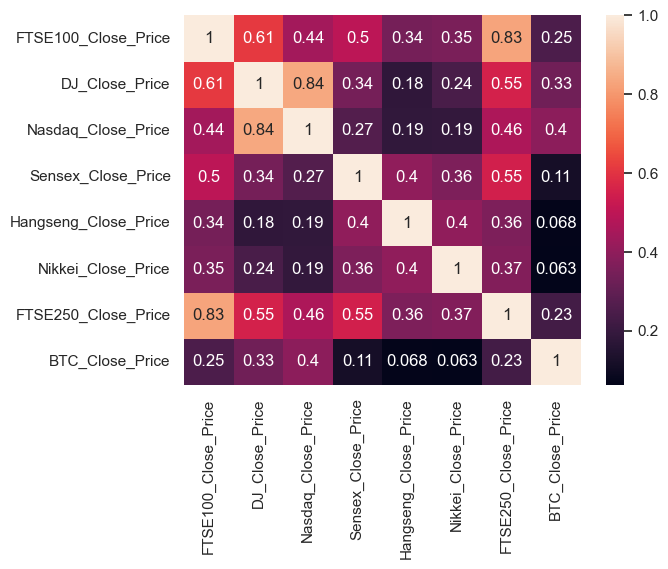

In [322]:
sns.heatmap(df_global_markets.corr(method='pearson'), annot=True)

In [323]:
# global currencies 

# global currencies don't follow the bitcoin trend 

## analysis is that we want to bring in the different currencies and then plot them against the bitcoin 
## then ensure the correlation on the differenced data is not correlated


In [324]:
# commodities 

## 3 commodities not impacting the price of bitcoin 
## dual time series - for 3 different interactions
## make the data stationary and then do the correlations


In [325]:
# inflation

## no correlation in g20 countries and the price and then plot

In [326]:
# interest rates

## Variance in interest rates don't impact rate of bitcoing
## log of bitcoin close price and then saw the interest rate over time

US_Treasury_Interest_Rate_%_Close_Price skew: 0.23


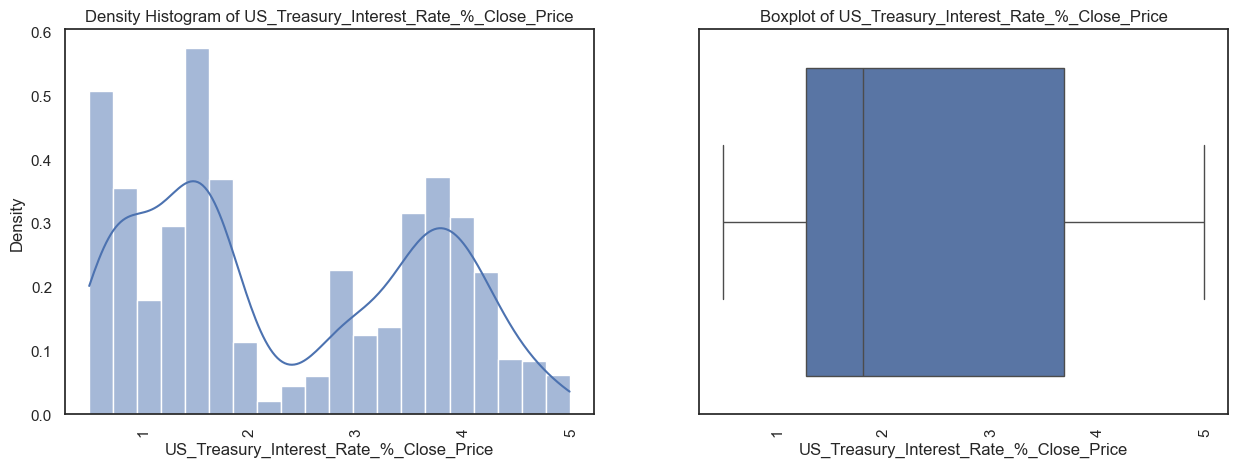

In [327]:
features = ['US_Treasury_Interest_Rate_%_Close_Price']
den_hist_boxplot(features, 20)

BTC_Close_Price skew: 0.35


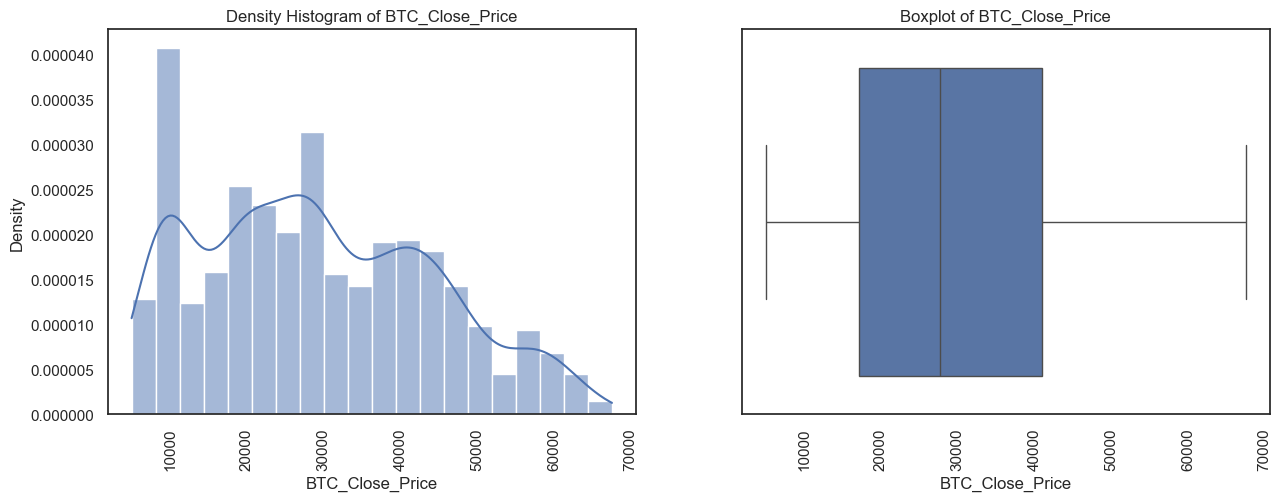

In [328]:
features = ['BTC_Close_Price']
den_hist_boxplot(features, 20)

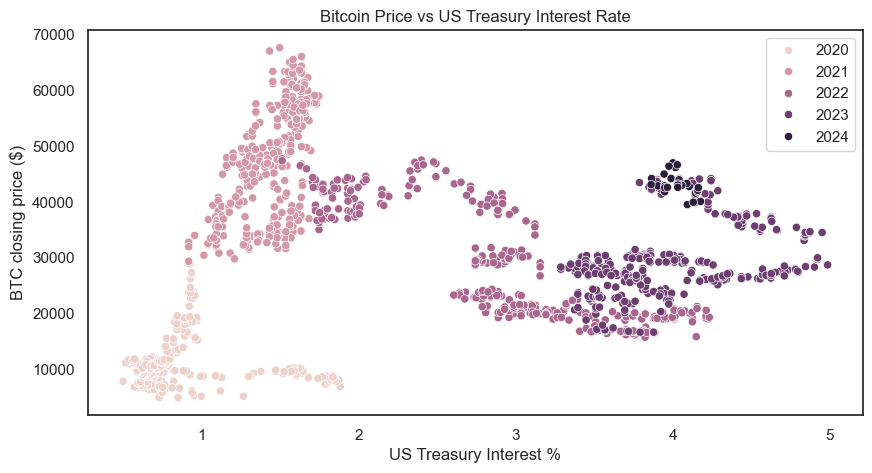

In [329]:
scatter_(df, y='BTC_Close_Price', x='US_Treasury_Interest_Rate_%_Close_Price', bitcoin=True, x_label='US Treasury Interest %', hue='year', y_label='BTC closing price ($)', title = 'Bitcoin Price vs US Treasury Interest Rate', show_leg=True)

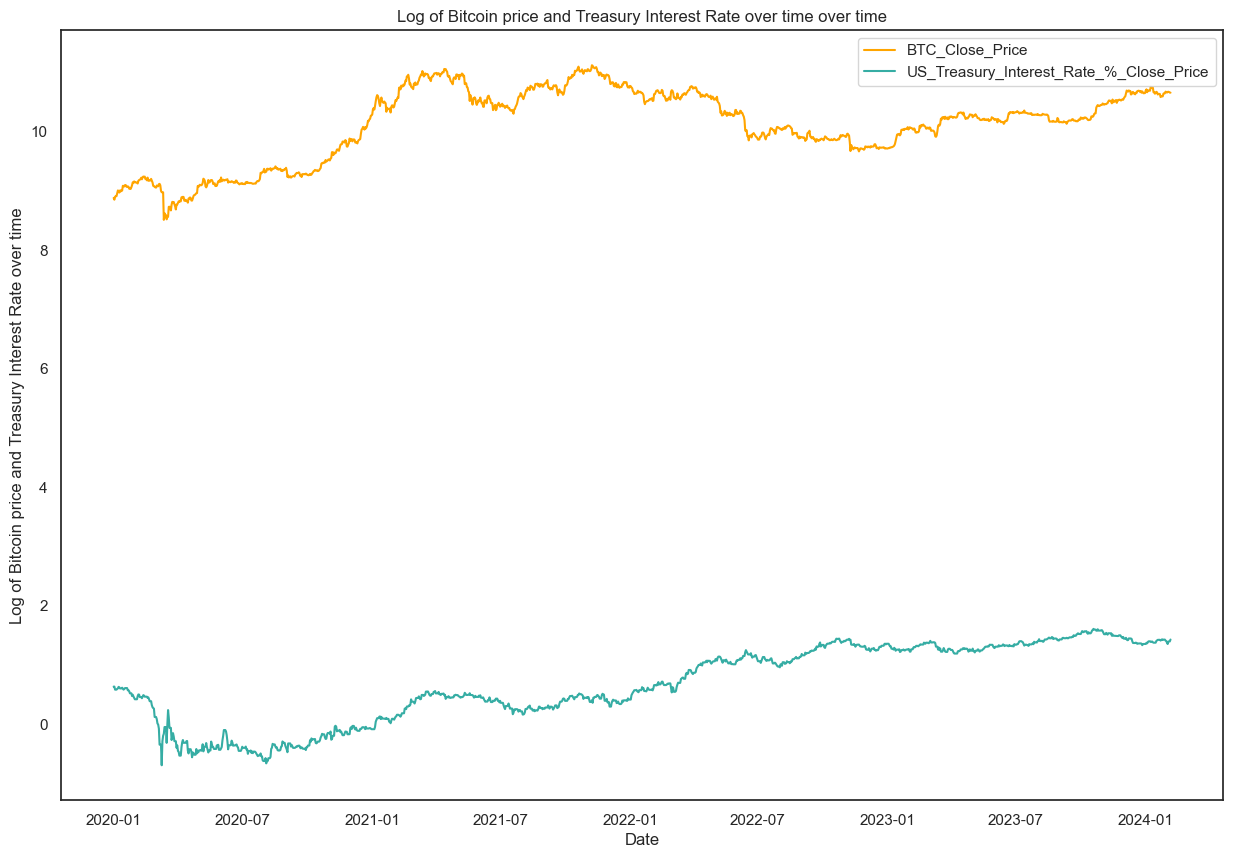

In [330]:
treasury_features = ['BTC_Close_Price', 'US_Treasury_Interest_Rate_%_Close_Price']

treasury_column_names = [i for i in treasury_features if 'Close' in i]

df_treasury = df[treasury_column_names].copy()
for col in treasury_column_names:
    df_treasury[col] = np.log(df_treasury[col])

fig, ax = plt.subplots(figsize=(15, 10))
for i, j in enumerate(treasury_column_names):
    palette = sns.color_palette('husl', n_colors=len(treasury_column_names))
    if j == 'BTC_Close_Price':
        bitcoin = True
    else:
        bitcoin = False
    timeseries_plot(df_treasury, y=j, ylabel='Log of Bitcoin price and Treasury Interest Rate over time', existing_ax=ax, color=palette[i], bitcoin=bitcoin)

plt.show()

In [331]:
# crypto currencies (OB)
## No correlation between untethered crypto coins and bitcoin
## There is no correlation between tethered crypto coins and bitcoin
## Bitcoins price trends do not match with other crypto currencies
## Make DF stationary using dickey_fuller, remove Volume. 
## plot all the crypto prices on line graphs (multi - subplots)
## logged them and then plotted on one graph

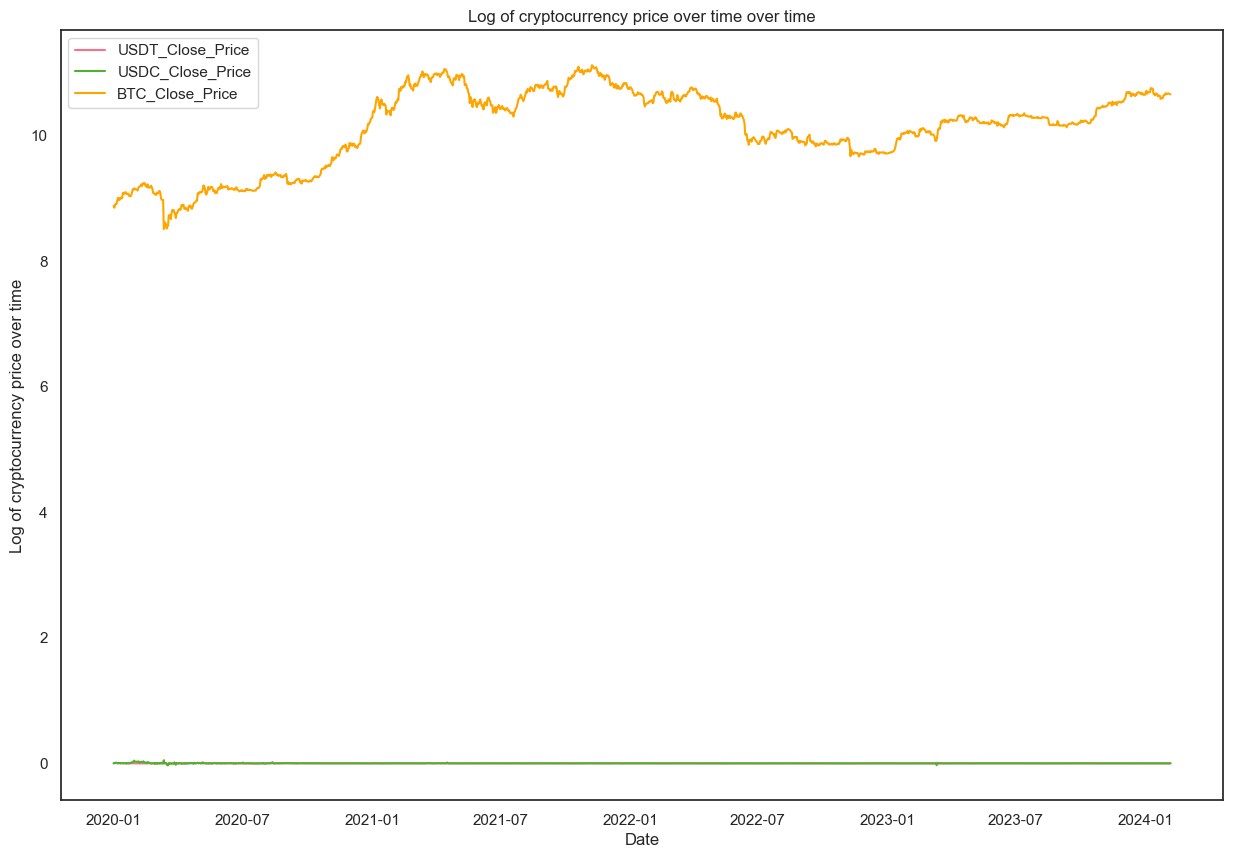

In [332]:
# Other crypto data = cryptocurrency_features
# This one with stable coins
cryptocurrency_features = [
    'USDT_Open', 'USDT_High', 'USDT_Low', 'USDT_Close_Price', 'USDT_Vol.',
    'USDC_Open', 'USDC_High', 'USDC_Low', 'USDC_Close_Price', 'USDC_Vol.',
]

cryptocurrency_column_names = [i for i in cryptocurrency_features if 'Close' in i]
cryptocurrency_column_names.append('BTC_Close_Price')

df_cryptos = df[cryptocurrency_column_names].copy()
for col in cryptocurrency_column_names:
    df_cryptos[col] = np.log(df_cryptos[col])

fig, ax = plt.subplots(figsize=(15, 10))
for i, j in enumerate(cryptocurrency_column_names):
    palette = sns.color_palette('husl', n_colors=len(cryptocurrency_column_names))
    if j == 'BTC_Close_Price':
        bitcoin = True
    else:
        bitcoin = False
    timeseries_plot(df_cryptos, y=j, ylabel='Log of cryptocurrency price over time', existing_ax=ax, color=palette[i], bitcoin=bitcoin)

plt.show()

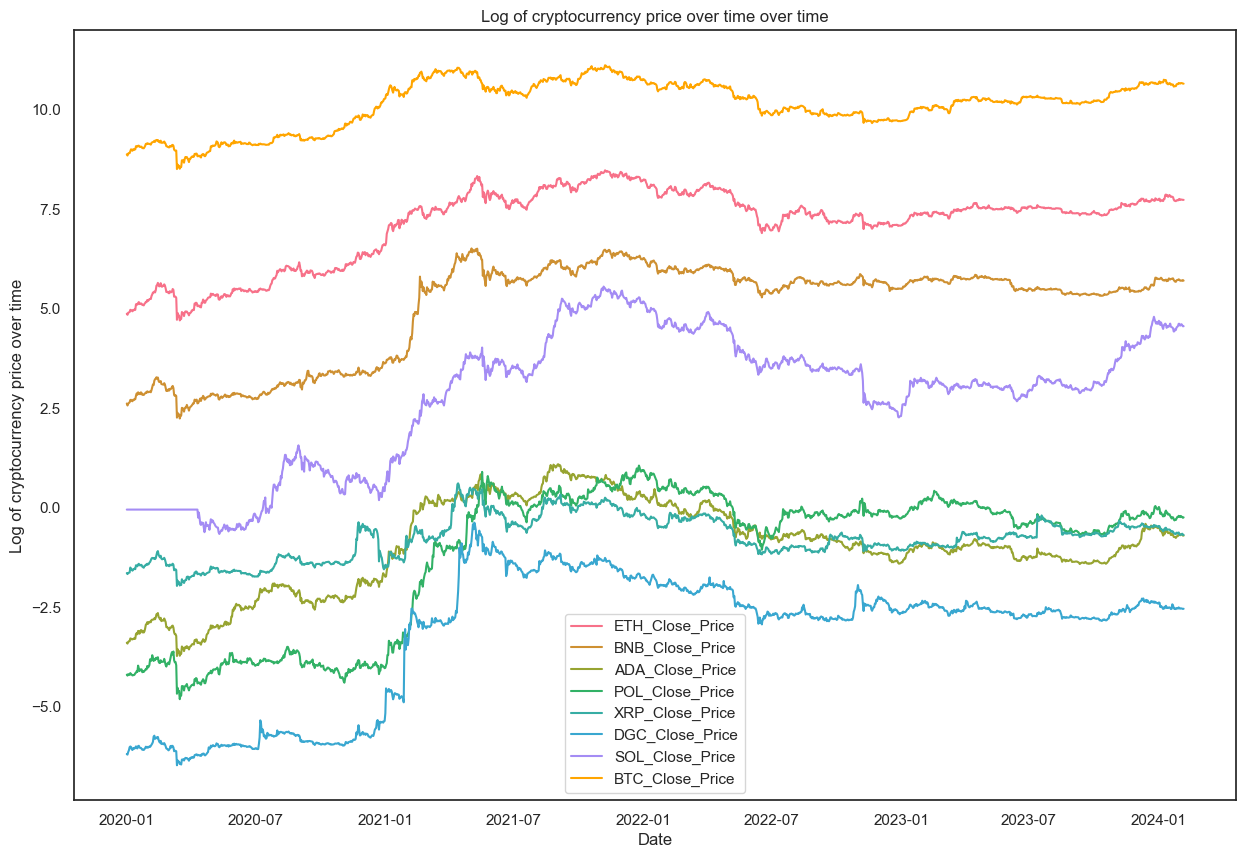

In [333]:
# Other crypto data = cryptocurrency_features
# This one WITHOUT stablecoins.
cryptocurrency_features = [
    'ETH_Open', 'ETH_High', 'ETH_Low', 'ETH_Close_Price', 'ETH_Vol.',
    'BNB_Open', 'BNB_High', 'BNB_Low', 'BNB_Close_Price', 'BNB_Vol.',
    'ADA_Open', 'ADA_High','ADA_Low', 'ADA_Close_Price', 'ADA_Vol.',
    'POL_Open', 'POL_High', 'POL_Low', 'POL_Close_Price', 'POL_Vol.',
    'XRP_Open', 'XRP_High', 'XRP_Low', 'XRP_Close_Price', 'XRP_Vol.',
    'DGC_Open', 'DGC_High', 'DGC_Low', 'DGC_Close_Price', 'DGC_Vol.',
    'SOL_Open', 'SOL_High', 'SOL_Low', 'SOL_Close_Price', 'SOL_Vol.'
]

cryptocurrency_column_names = [i for i in cryptocurrency_features if 'Close' in i]
cryptocurrency_column_names.append('BTC_Close_Price')

df_cryptos = df[cryptocurrency_column_names].copy()

for col in cryptocurrency_column_names:
    df_cryptos[col] = np.log(df_cryptos[col])

fig, ax = plt.subplots(figsize=(15, 10))

for i, j in enumerate(cryptocurrency_column_names):
    palette = sns.color_palette('husl', n_colors=len(cryptocurrency_column_names))
    if j == 'BTC_Close_Price':
        bitcoin = True
    else:
        bitcoin = False
    timeseries_plot(df_cryptos, y=j, ylabel='Log of cryptocurrency price over time', existing_ax=ax, color=palette[i], bitcoin=bitcoin)

plt.show()

In [334]:
for col in df_cryptos:
    df_cryptos[col] = df_cryptos[col].diff() # this makes it stationary.
df_cryptos.drop(index='2020-01-01', inplace=True) # drop the one row with NaNs. 
dickeyFullerTest(df_cryptos)

ETH_Close_Price is stationary
BNB_Close_Price is stationary
ADA_Close_Price is stationary
POL_Close_Price is stationary
XRP_Close_Price is stationary
DGC_Close_Price is stationary
SOL_Close_Price is stationary
BTC_Close_Price is stationary


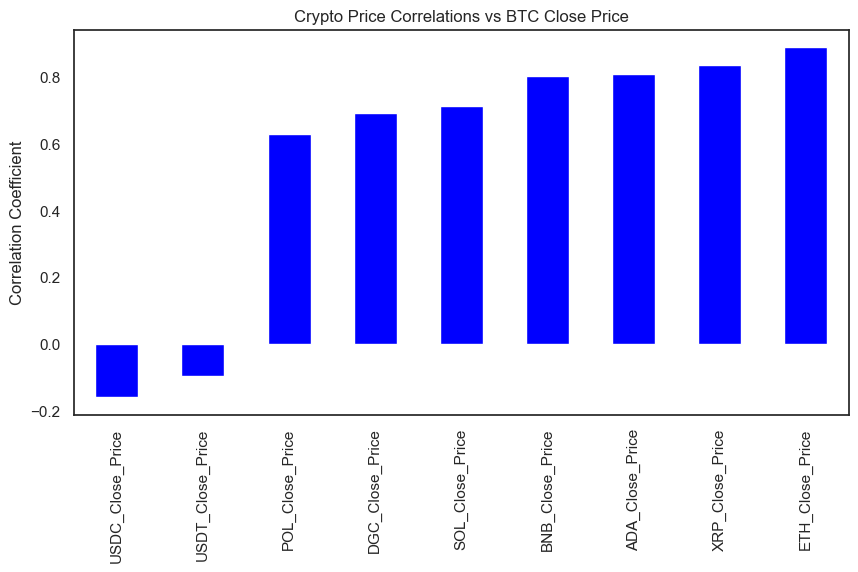

In [335]:
cryptocurrency_features = [
    'ETH_Close_Price',
    'BNB_Close_Price',
    'ADA_Close_Price',
    'POL_Close_Price',
    'XRP_Close_Price',
    'DGC_Close_Price',
    'SOL_Close_Price',
    'USDT_Close_Price',
    'USDC_Close_Price']
cryptocurrency_column_names = [i for i in cryptocurrency_features if 'Close' in i]
cryptocurrency_column_names.append('BTC_Close_Price')
df_cryptos = df[cryptocurrency_column_names].copy()

corr_bar(df, title='Crypto Price Correlations vs BTC Close Price', y_label='Correlation Coefficient', group=cryptocurrency_features, var_comp='BTC_Close_Price')

In [336]:
# companies

## The price of bitcoin does not follow trends as it's key investor companies
## lineplots and then correlations


In [337]:
# confidence levels

In [338]:
# news and sentiment 

In [339]:
# global events